In [51]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [52]:
print(tf.__version__)

2.5.0


In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
len(train_images)

60000

In [59]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [62]:
test_images.shape

(10000, 28, 28)

In [63]:
len(test_labels)

10000

<function matplotlib.pyplot.show(close=None, block=None)>

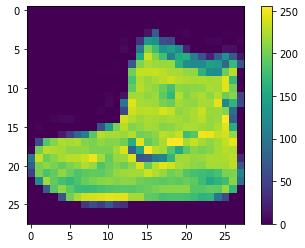

In [67]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [68]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

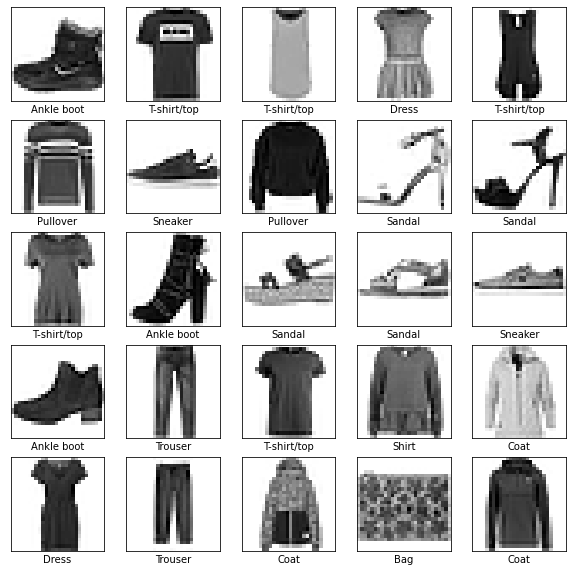

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [76]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [77]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4978 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3744 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3370 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3104 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8921


In [90]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,  verbose=2)

print('\n테스트 정확도 : ', test_acc)

313/313 - 0s - loss: 0.3619 - accuracy: 0.8730

테스트 정확도 :  0.8730000257492065


In [91]:
predictions = model.predict(test_images)

In [92]:
predictions[0]

array([5.3106446e-06, 2.3274128e-08, 4.5086952e-07, 5.0775240e-10,
       7.2576171e-07, 5.6681600e-03, 1.6171024e-06, 1.8386443e-01,
       5.0229832e-05, 8.1040907e-01], dtype=float32)

In [93]:
np.argmax(predictions[0])

9

In [94]:
test_labels[0]

9

In [99]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


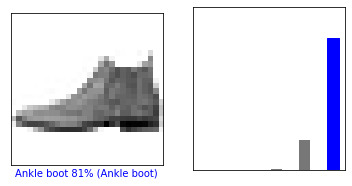

In [100]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


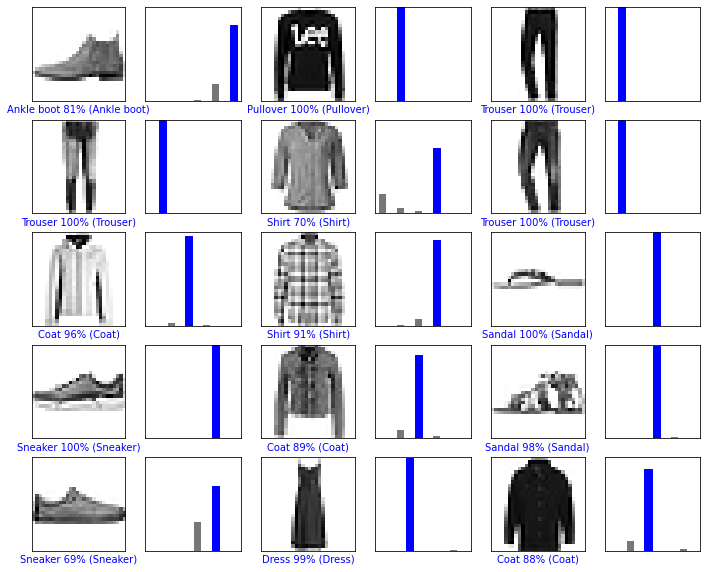

In [113]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [104]:
img = test_images[0]

print(img.shape)

(28, 28)


In [105]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [106]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.3106542e-06 2.3274124e-08 4.5086992e-07 5.0775323e-10 7.2576091e-07
  5.6681568e-03 1.6171022e-06 1.8386456e-01 5.0229872e-05 8.1040895e-01]]


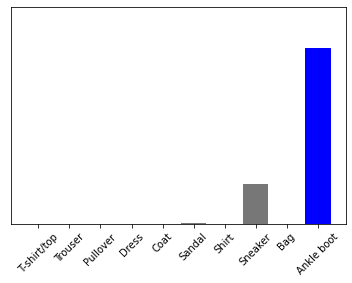

In [110]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [111]:
np.argmax(predictions_single[0])

9